In [1]:
import warnings
warnings.filterwarnings('ignore')

[*********************100%***********************]  1 of 1 completed


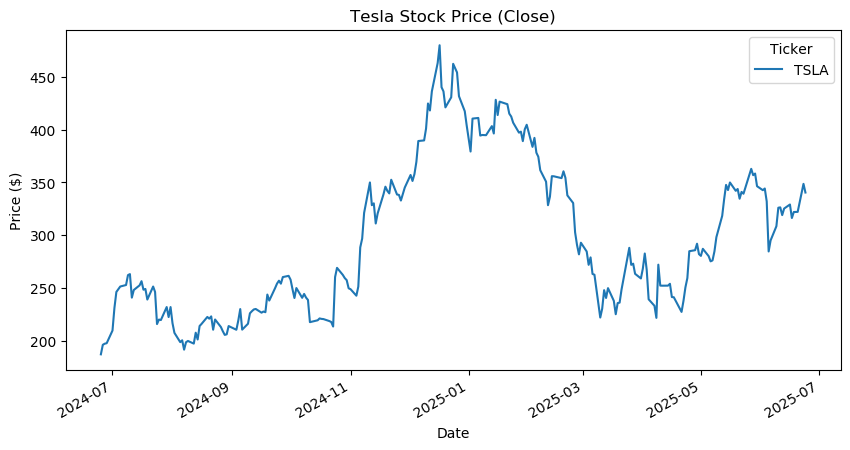

Training size: 238, Test size: 12
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1908.377, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1910.169, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1910.189, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1906.598, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1912.053, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.313 seconds
Best ARIMA order: (0, 1, 0)


C:\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


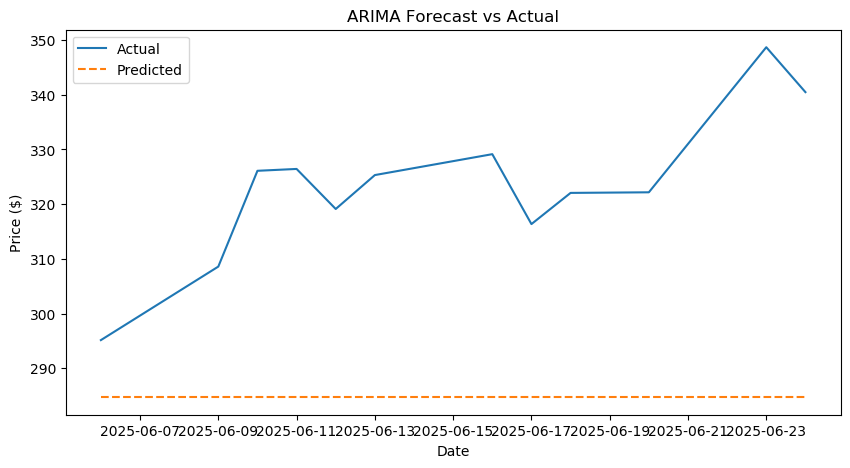

RMSE: 40.77
MAPE: 11.79%


In [4]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Download Tesla stock data for 1 years
tsla = yf.download('TSLA', period='1y')

# Step 2: Select only the 'Close' price as our time series
df = tsla['Close']
df = df.dropna()  # Remove missing values if any

# Plot the time series
df.plot(figsize=(10, 5), title='Tesla Stock Price (Close)', ylabel='Price ($)')
plt.show()

# Step 3: Split the data into training and test sets (95% train, 5% test)
train_size = round(len(df) * 0.95)
train, test = df[:train_size], df[train_size:]

print(f"Training size: {len(train)}, Test size: {len(test)}")

# Step 4: Define evaluation metric
def rmse_mape(actual, predicted):
    actual = np.array(actual).flatten()
    predicted = np.array(predicted).flatten()
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")


# Step 5: Use auto_arima to find the best (p,d,q) order
stepwise_model = auto_arima(train, 
                            start_p=0, start_q=0,
                            max_p=5, max_q=5,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# Show best model order
print(f"Best ARIMA order: {stepwise_model.order}")

# Step 6: Fit the ARIMA model with best order
model = ARIMA(train, order=stepwise_model.order)
model_fit = model.fit()

# Step 7: Forecast the test period
forecast = model_fit.forecast(steps=len(test))

# Step 8: Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Predicted', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Step 9: Evaluate performance
rmse_mape(test, forecast)


In [ ]:
#pip uninstall urllib3 -y


In [ ]:
#!pip install urllib3==1.26.16


In [ ]:
#pip show urllib3

In [ ]:
#!pip install pmdarima


In [ ]:
#from pmdarima import auto_arima
print("pmdarima imported successfully")


In [ ]:
#import sys
#!{sys.executable} -m pip install pmdarima
